In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from datetime import timedelta


In [13]:
traffic = pd.read_csv('/Users/mtc/ADS/ADS 506/Homework/Module 1/Metro_Interstate_Traffic_Volume.csv')

traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['temp'] = (traffic['temp'] * (9 / 5)) - 459.67  # Convert to Fahrenheit
traffic['is_holiday'] = traffic['holiday'].notnull().astype(int)
traffic['day'] = traffic['date_time'].dt.day_name()
traffic['rain_1h'] = np.where(traffic['rain_1h'] > 2500, 21.4, traffic['rain_1h'])
traffic['temp'] = np.where(traffic['temp'] < -100, 20.6, traffic['temp'])

# Filter the dataset
traffic_data = traffic[(traffic['date_time'] >= '2015-06-11') & 
                             (traffic['date_time'] <= '2018-09-30')]
# Feature engineering
traffic_data['hour'] = traffic_data['date_time'].dt.hour
traffic_data['month'] = traffic_data['date_time'].dt.month
traffic_data['is_weekend'] = traffic_data['day'].isin(['Saturday', 'Sunday']).astype(int)
traffic_data['rush_hour'] = ((traffic_data['hour'] >= 6) & (traffic_data['hour'] <= 9) | 
                             (traffic_data['hour'] >= 16) & (traffic_data['hour'] <= 19)).astype(int)

/var/folders/8l/wybh14tj3577ml8c3qhgx90m0000gn/T/ipykernel_62718/4180622355.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_data['hour'] = traffic_data['date_time'].dt.hour
/var/folders/8l/wybh14tj3577ml8c3qhgx90m0000gn/T/ipykernel_62718/4180622355.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_data['month'] = traffic_data['date_time'].dt.month
/var/folders/8l/wybh14tj3577ml8c3qhgx90m0000gn/T/ipykernel_62718/4180622355.py:16: SettingWithCopyWarning: 
A value is trying to be set on

In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,is_holiday,day
0,NaN,59.234,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,0,Tuesday
1,NaN,61.178,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,0,Tuesday
2,NaN,61.574,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,0,Tuesday
3,NaN,62.564,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,0,Tuesday
4,NaN,64.382,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,0,Tuesday


Text(0.5, 1.0, 'Date versus Traffic Volume From September 23-29, 2018')

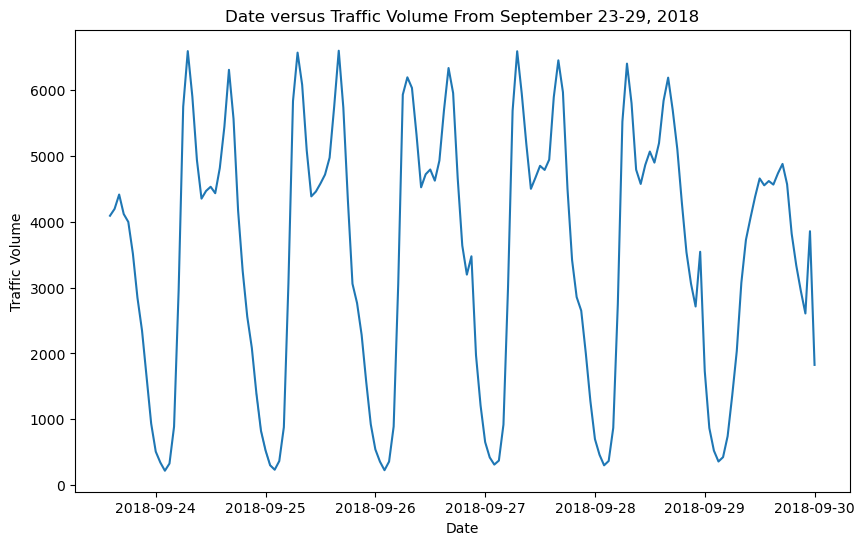

In [4]:
plt.figure(figsize= (10, 6))

sns.lineplot(x = 'date_time', y = 'traffic_volume', data = traffic_data.tail(24*7))
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Date versus Traffic Volume From September 23-29, 2018')


Text(0.5, 1.0, 'Date/Time versus Traffic Volume on September 29, 2018')

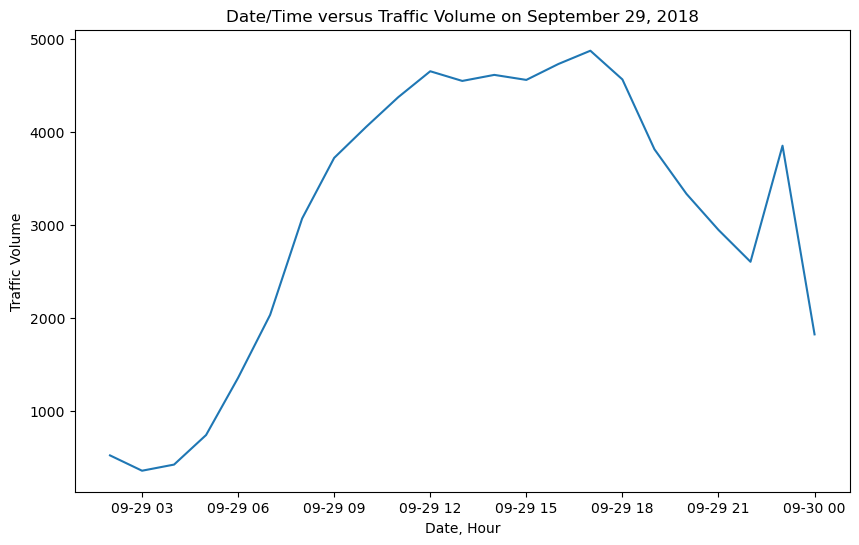

In [5]:
plt.figure(figsize= (10, 6))

sns.lineplot(x = 'date_time', y = 'traffic_volume', data = traffic_data.tail(24))
plt.xlabel('Date, Hour')
plt.ylabel('Traffic Volume')
plt.title('Date/Time versus Traffic Volume on September 29, 2018')


Text(0.5, 1.0, 'Histogram of Traffic Volume')

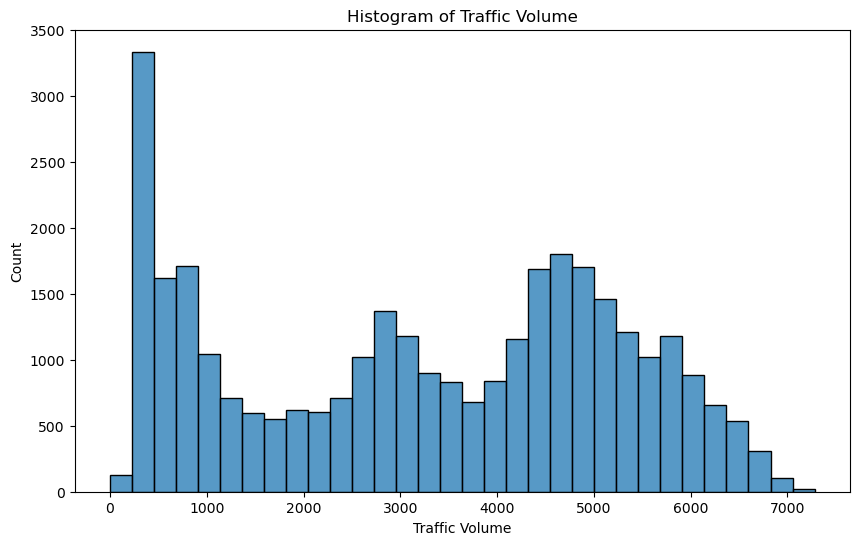

In [6]:
plt.figure(figsize= (10, 6))

sns.histplot(x  = 'traffic_volume', data = traffic_data)
plt.xlabel('Traffic Volume')
plt.ylabel('Count')
plt.title('Histogram of Traffic Volume')

Text(0.5, 1.0, 'Histogram of Temperature')

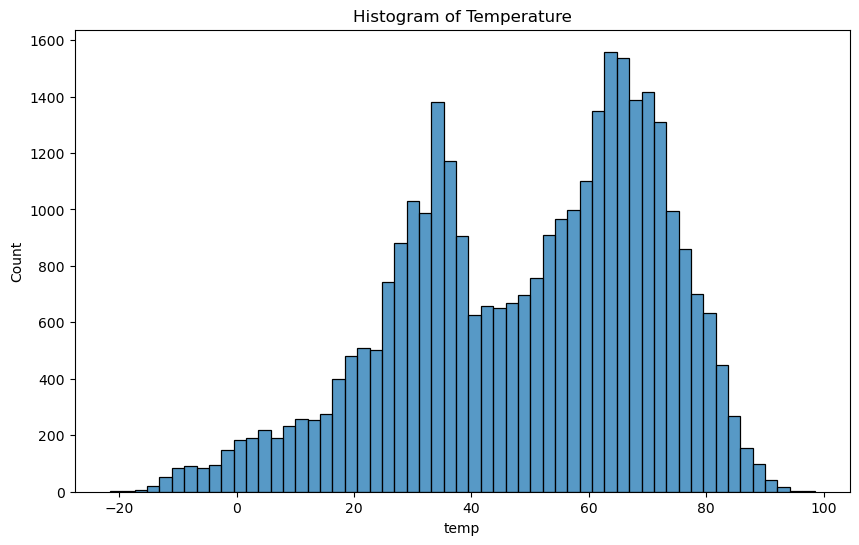

In [14]:
plt.figure(figsize= (10, 6))

sns.histplot(x  = 'temp', data = traffic_data)
plt.xlabel('temp')
plt.ylabel('Count')
plt.title('Histogram of Temperature')